In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.chdir('..')
%matplotlib inline

`tools\datasets.py`

## 1 生成数据

```
class DataGenerator: 用于生成数据的类
    __init__:
        p[int]: 类个数
        field[list(2 x 2)]: 两个维度的定义域，默认1-10，1-10
        np_list [list < int >]: 每个类点个数, 默认每类20个点
        refernce_point_list [list < list < float >>]: 每个类的中心，默认在定义域上从均匀分布中随机生成
        sd_list [list < float >]: 每个类的方差，默认为每一类离最近点距离/分离度(sep)
        sep[float]: 类间数据分离度
        seed[int]: 随机数种子，默认随机生成

    Attributes:
        seed[int]: 当前随机数种子

        _data[torch.Tensor (2 x n, sparse)]: 
        _label[torch.Tensor (n x 1)]:

    Method:
        get_data(): 获取数据
        plot(): 绘制数据图像
        write(id[str]): 将数据写入文件

        _generate_data(): 生成数据
```

In [2]:
from tools.datasets import DataGenerator

使用方法：
- 初始化`DataGenerator`类并传入参数，生成数据
- 通过`DataGenerator.get_data()`方法获取生成数据

In [3]:
data_generator=DataGenerator(p=5,sep=4)
data,label=data_generator.get_data()
print("dataset\tdata_shape\tlabel_shape\tdata_type\tlabel_type\t")
print(f"self-generated\t{data.shape}\t{label.shape}\t{type(data)}\t{type(label)}")

dataset	data_shape	label_shape	data_type	label_type	
self-generated	torch.Size([2, 100])	(100,)	<class 'torch.Tensor'>	<class 'numpy.ndarray'>


可以使用`DataGenerator.plot()`方法查看生成数据图像。

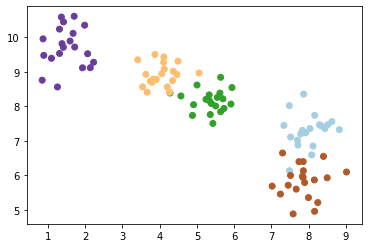

In [4]:
data_generator.plot()

`p`参数控制类的个数。

p=2


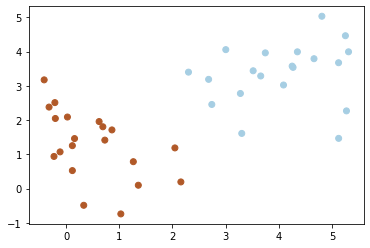

p=3


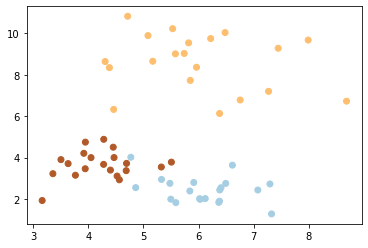

p=4


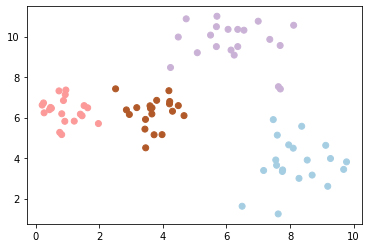

In [5]:
for p in range(2,5):
    print(f'p={p}')
    data_generator=DataGenerator(p=p,sep=4)
    data_generator.plot()

没有人为指定方差时，`sep`参数可以控制类间的分离程度。

sep=1


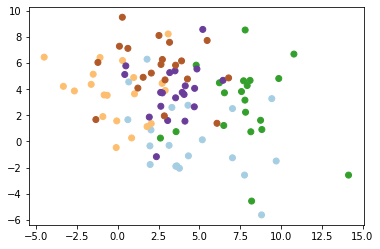

sep=3


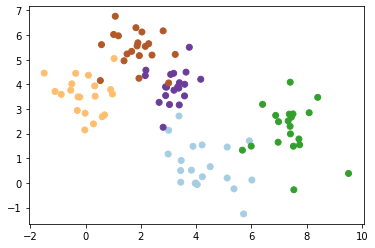

sep=5


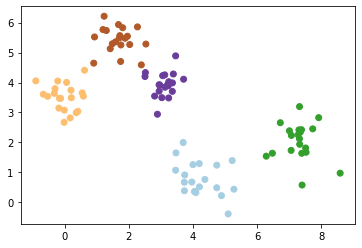

sep=8


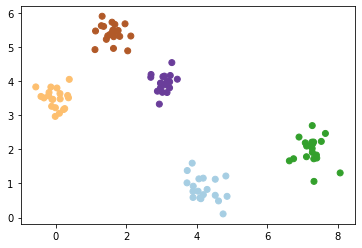

In [6]:
seed=1
for sep in [1,3,5,8]:
    print(f'sep={sep}')
    data_generator=DataGenerator(p=5,sep=sep,seed=seed)
    data_generator.plot()

如果随机得到一组比较满意的数据，可以通过`DataGenerator.seed`属性获得当前随机数种子，方便复现。

seed=4438


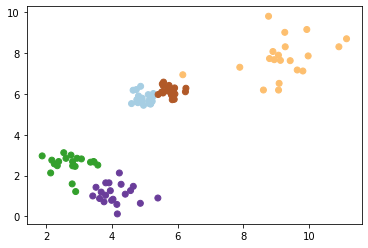

In [7]:
data_generator=DataGenerator(p=5,sep=4)
seed=data_generator.seed
print(f'seed={seed}')
data_generator.plot()

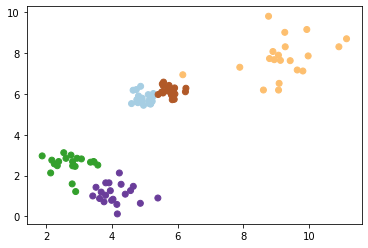

In [8]:
data_generator=DataGenerator(p=5,sep=4,seed=seed)
data_generator.plot()

也可以人为指定每一类的样本量、方差以及中心。

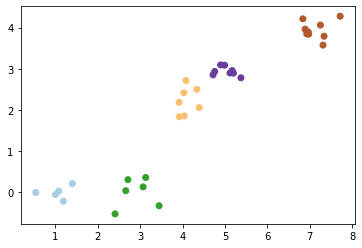

In [9]:
params={
    'p':5,
    'sep':4,
    'np_list':[5,6,7,8,9],
    'sd_list':[0.3]*5,
    'refernce_point_list':[[1,0],[3,0],[4,2],[5,3],[7,4]],
    'seed':10
}

data_generator=DataGenerator(**params)
data_generator.plot()

可以使用`DataGenerator.write(id[str])`方法将生成数据写入文件，可用下面的`load_data`函数读取。
- 存入`data`文件夹中.
- 命名格式：`self_generated_{id}_{data|label}`

In [10]:
data_generator.write('1')

## 2 读取数据

```
load_data(name)

    Args:
        name [str]: 数据集名称，选项 {'mnist','segment','vowel','wine','self_generated_{id}'}

    Retuerns:
        data [torch.Tensor (d x n, sparse)]:
        label [torch.Tensor (n x 1)]:
```

通过数据集名称获取真实数据集或保存的生成数据集

In [11]:
from tools.datasets import load_data

data,label=load_data('segment')
data,label=load_data('self_generated_1')

In [12]:
data_list=['mnist','segment','vowel','wine','self_generated_1']


print(f"{'dataset':<20}{'data_shape':<25}{'label_shape':<15}{'data_type':<25}label_type")
for name in data_list:
    data,label=load_data(name)
    print(f"{name:<20}{str(data.shape):<25}{str(label.shape):<15}{str(type(data)):<25}{type(label)}")

dataset             data_shape               label_shape    data_type                label_type
mnist               torch.Size([784, 60000]) (60000,)       <class 'torch.Tensor'>   <class 'numpy.ndarray'>
segment             torch.Size([19, 2310])   (2310,)        <class 'torch.Tensor'>   <class 'numpy.ndarray'>
vowel               torch.Size([10, 528])    (528,)         <class 'torch.Tensor'>   <class 'numpy.ndarray'>
wine                torch.Size([13, 178])    (178,)         <class 'torch.Tensor'>   <class 'numpy.ndarray'>
self_generated_1    torch.Size([2, 35])      (35,)          <class 'torch.Tensor'>   <class 'numpy.ndarray'>
